# Z-density profiles

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj

In [20]:
trj = mdtraj.load('../c2mim_bf4_gr/run/traj.dcd', top='../c2mim_bf4_gr/config.pdb')
print(trj)

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
<mdtraj.Trajectory with 1000 frames, 6160 atoms, 401 residues, and unitcells>


In [21]:
atoms, bonds = trj.topology.to_dataframe()
res = pd.unique(atoms['resName'])

In [22]:
mols = pd.DataFrame(index=res, columns=['natoms', 'nmols'])
for spec in res:
    moli = atoms.query(f"resName == '{spec}'").index
    i = moli[0]
    j = moli[-1]
    nmols = atoms.iloc[j].resSeq - atoms.iloc[i].resSeq + 1
    natoms = int((j - i + 1) / nmols)
    mols.loc[spec] = [natoms, nmols]
mols

,natoms,nmols
gra,1360,1
c2c,19,200
BF4,5,200


In [23]:
def showatoms(atoms, mols, res):
    offset = atoms.query(f"resName == '{res}'").index[0]
    print(atoms[offset:offset+mols.loc[res].natoms])

In [24]:
showatoms(atoms, mols, 'c2c')

      serial name element  resSeq resName  chainID segmentID  formal_charge
1360    1361   N1       N       2     c2c        0                     <NA>
1361    1362   C1       C       2     c2c        0                     <NA>
1362    1363   N2       N       2     c2c        0                     <NA>
1363    1364   C2       C       2     c2c        0                     <NA>
1364    1365   C3       C       2     c2c        0                     <NA>
1365    1366   C4       C       2     c2c        0                     <NA>
1366    1367   H1       H       2     c2c        0                     <NA>
1367    1368   C5       C       2     c2c        0                     <NA>
1368    1369   H2       H       2     c2c        0                     <NA>
1369    1370   H3       H       2     c2c        0                     <NA>
1370    1371   H4       H       2     c2c        0                     <NA>
1371    1372   H5       H       2     c2c        0                     <NA>
1372    1373

In [25]:
showatoms(atoms, mols, 'BF4')

      serial name element  resSeq resName  chainID segmentID  formal_charge
5160    5161    B       B     202     BF4        0                     <NA>
5161    5162   F1       F     202     BF4        0                     <NA>
5162    5163   F2       F     202     BF4        0                     <NA>
5163    5164   F3       F     202     BF4        0                     <NA>
5164    5165   F4       F     202     BF4        0                     <NA>


In [26]:
trj.unitcell_lengths[0]

array([ 4.228712 ,  4.3048778, 10.       ], dtype=float32)

In [70]:
sel_cat = atoms.query("resName == 'c2c' and name == 'C1'").index
sel_cat

Index([1361, 1380, 1399, 1418, 1437, 1456, 1475, 1494, 1513, 1532,
       ...
       4971, 4990, 5009, 5028, 5047, 5066, 5085, 5104, 5123, 5142],
      dtype='int64', length=200)

In [71]:
sel_ani = atoms.query("resName == 'BF4' and name == 'B'").index
sel_ani

Index([5160, 5165, 5170, 5175, 5180, 5185, 5190, 5195, 5200, 5205,
       ...
       6110, 6115, 6120, 6125, 6130, 6135, 6140, 6145, 6150, 6155],
      dtype='int64', length=200)

In [72]:
z_cat = trj.xyz[:, sel_cat][..., 2]
z_cat.shape

(1000, 200)

In [73]:
z_ani = trj.xyz[:, sel_ani][..., 2]
z_ani.shape

(1000, 200)

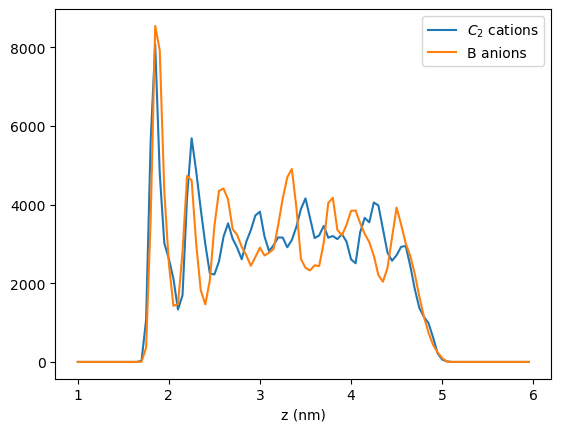

In [82]:
c_cat, bins = np.histogram(z_cat.flatten(), range=(1.0, 6.0), bins=100)
c_ani, bins = np.histogram(z_ani.flatten(), range=(1.0, 6.0), bins=100)

plt.plot(bins[:-1], c_cat, label='$C_2$ cations')
plt.plot(bins[:-1], c_ani, label='B anions')
plt.legend()
plt.xlabel('z (nm)')
plt.show()

In [63]:
len(count)

100

In [65]:
bins

array([1.74013269, 1.77371168, 1.80729079, 1.84086978, 1.87444878,
       1.90802777, 1.94160676, 1.97518587, 2.00876474, 2.04234385,
       2.07592297, 2.10950184, 2.14308095, 2.17666006, 2.21023893,
       2.24381804, 2.27739716, 2.31097603, 2.34455514, 2.37813425,
       2.41171312, 2.445292  , 2.47887111, 2.51245022, 2.54602909,
       2.5796082 , 2.61318731, 2.64676619, 2.6803453 , 2.71392441,
       2.74750328, 2.78108239, 2.8146615 , 2.84824038, 2.88181925,
       2.9153986 , 2.94897747, 2.98255634, 3.01613569, 3.04971457,
       3.08329344, 3.11687255, 3.15045166, 3.18403053, 3.21760964,
       3.25118876, 3.28476763, 3.31834674, 3.35192585, 3.38550472,
       3.4190836 , 3.45266294, 3.48624182, 3.51982069, 3.55340004,
       3.58697891, 3.62055779, 3.6541369 , 3.68771601, 3.72129488,
       3.75487423, 3.7884531 , 3.82203197, 3.85561085, 3.8891902 ,
       3.92276907, 3.95634794, 3.98992729, 4.02350616, 4.05708504,
       4.09066439, 4.12424326, 4.15782213, 4.19140148, 4.22498